# Car_Demand Regression Problem

Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
data=pd.read_csv('data_car.csv')

data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


# EDA

In [6]:
data.shape

(11914, 16)

In [7]:
data.dtypes.value_counts()

object     8
int64      5
float64    3
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [8]:
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [9]:
data.duplicated().sum()

715

In [10]:
num_data=data.select_dtypes(include=['int64','float64'])
num_data

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500
...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,46120
11910,2012,300.0,6.0,4.0,23,16,204,56670
11911,2012,300.0,6.0,4.0,23,16,204,50620
11912,2013,300.0,6.0,4.0,23,16,204,50920


In [11]:
cat_data=data.select_dtypes(include=['object'])
cat_data

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
0,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe
1,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible
2,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe
3,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe
4,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible
...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11910,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11911,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11912,Acura,ZDX,premium unleaded (recommended),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback


# Univariate analysis

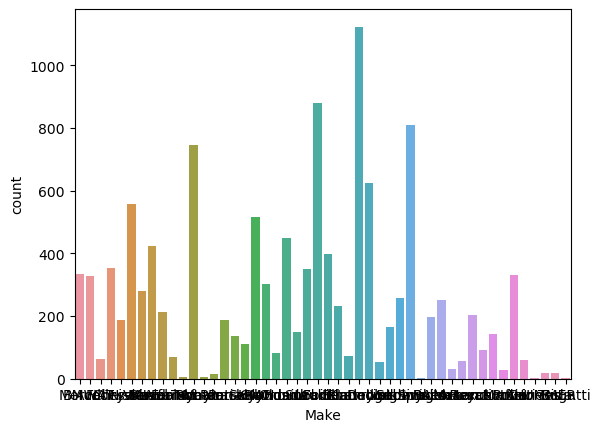

In [12]:
sns.countplot(x='Make',data=data);

In [13]:
data['Make'].value_counts()

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyker    

From the graph it is clear that Chevrolet is having high value counts

<Axes: xlabel='Engine Cylinders', ylabel='Count'>

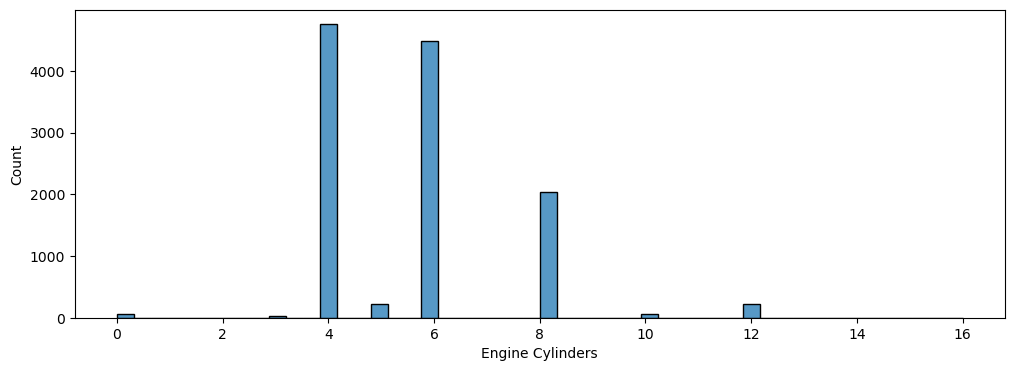

In [18]:
plt.figure(figsize=(12,4))
sns.histplot(data['Engine Cylinders'],bins=50)

<Axes: ylabel='Model'>

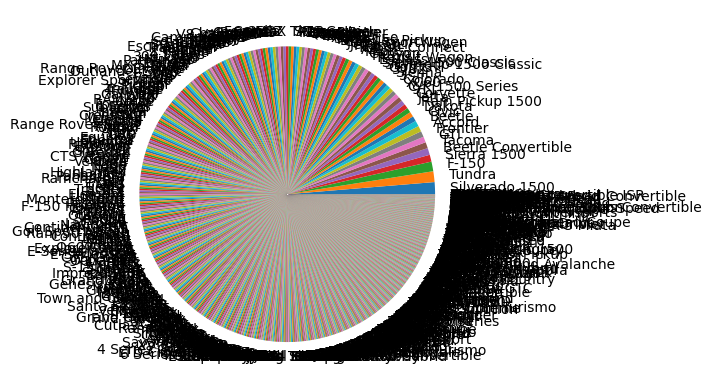

In [17]:
data['Model'].value_counts().plot(kind="pie");

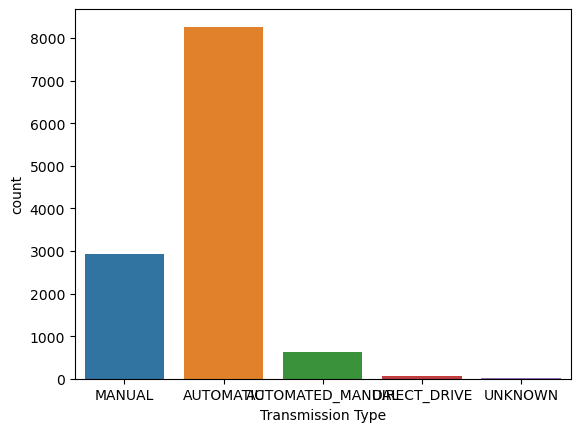

In [19]:
sns.countplot(x='Transmission Type',data=data);

From the above graph it is clear that automatic transmission number is high and count is 8000

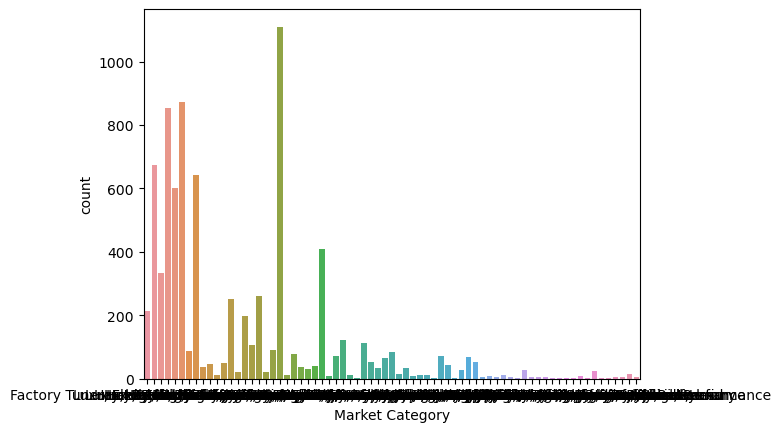

In [20]:
sns.countplot(x='Market Category',data=data);

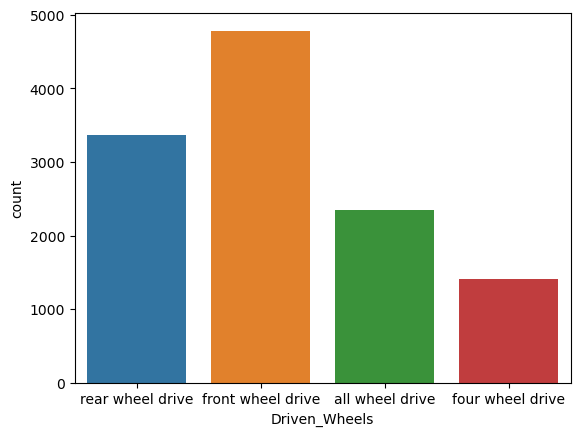

In [21]:
sns.countplot(x='Driven_Wheels',data=data);

From the above graph it is clear that front wheel driven models are highest in number

# Bivariate analysis

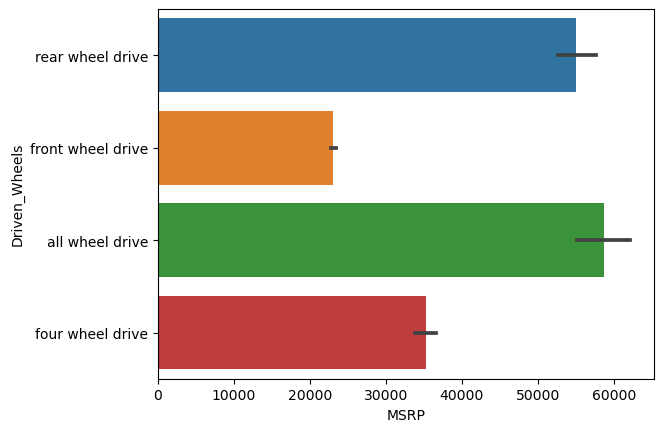

In [24]:
sns.barplot(x=data["MSRP"],y=data["Driven_Wheels"])
plt.show()

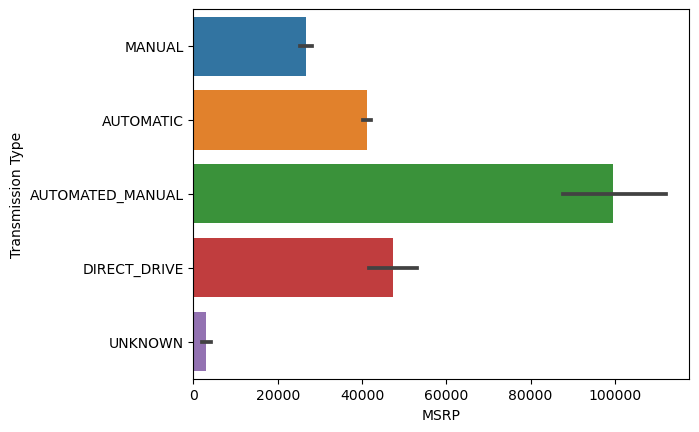

In [25]:
sns.barplot(x=data["MSRP"],y=data["Transmission Type"])
plt.show()

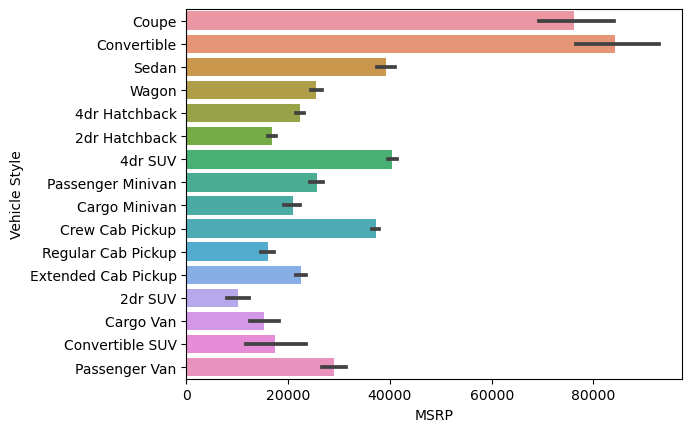

In [26]:
sns.barplot(x=data["MSRP"],y=data["Vehicle Style"])
plt.show()

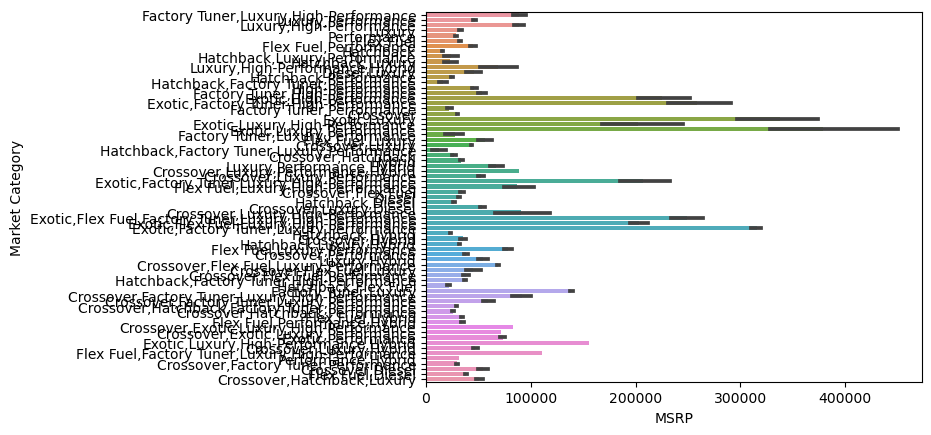

In [27]:
sns.barplot(x=data["MSRP"],y=data["Market Category"])
plt.show()

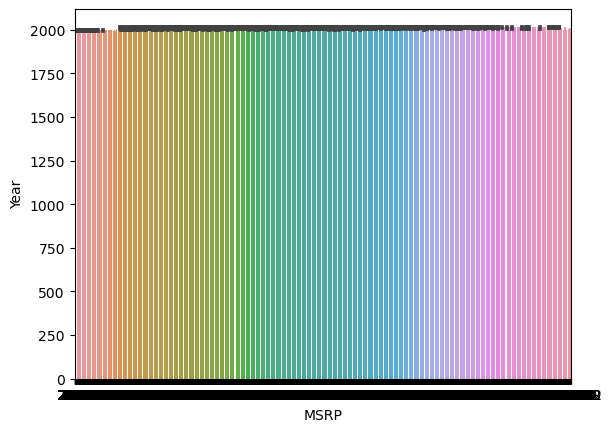

In [28]:
sns.barplot(x=data["MSRP"],y=data["Year"])
plt.show()

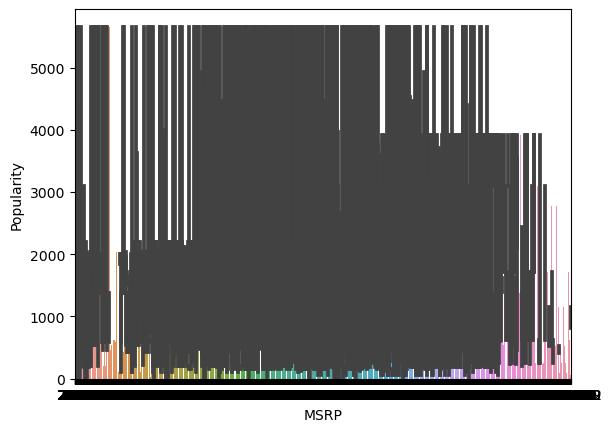

In [29]:
sns.barplot(x=data["MSRP"],y=data["Popularity"])
plt.show()

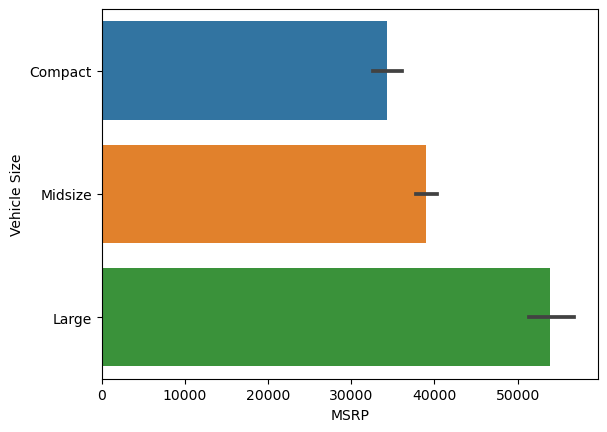

In [31]:
sns.barplot(x=data["MSRP"],y=data["Vehicle Size"])
plt.show()

# Multivariate analysis

C:\Users\cvamb\AppData\Local\Temp\ipykernel_23064\2178605121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.corr()


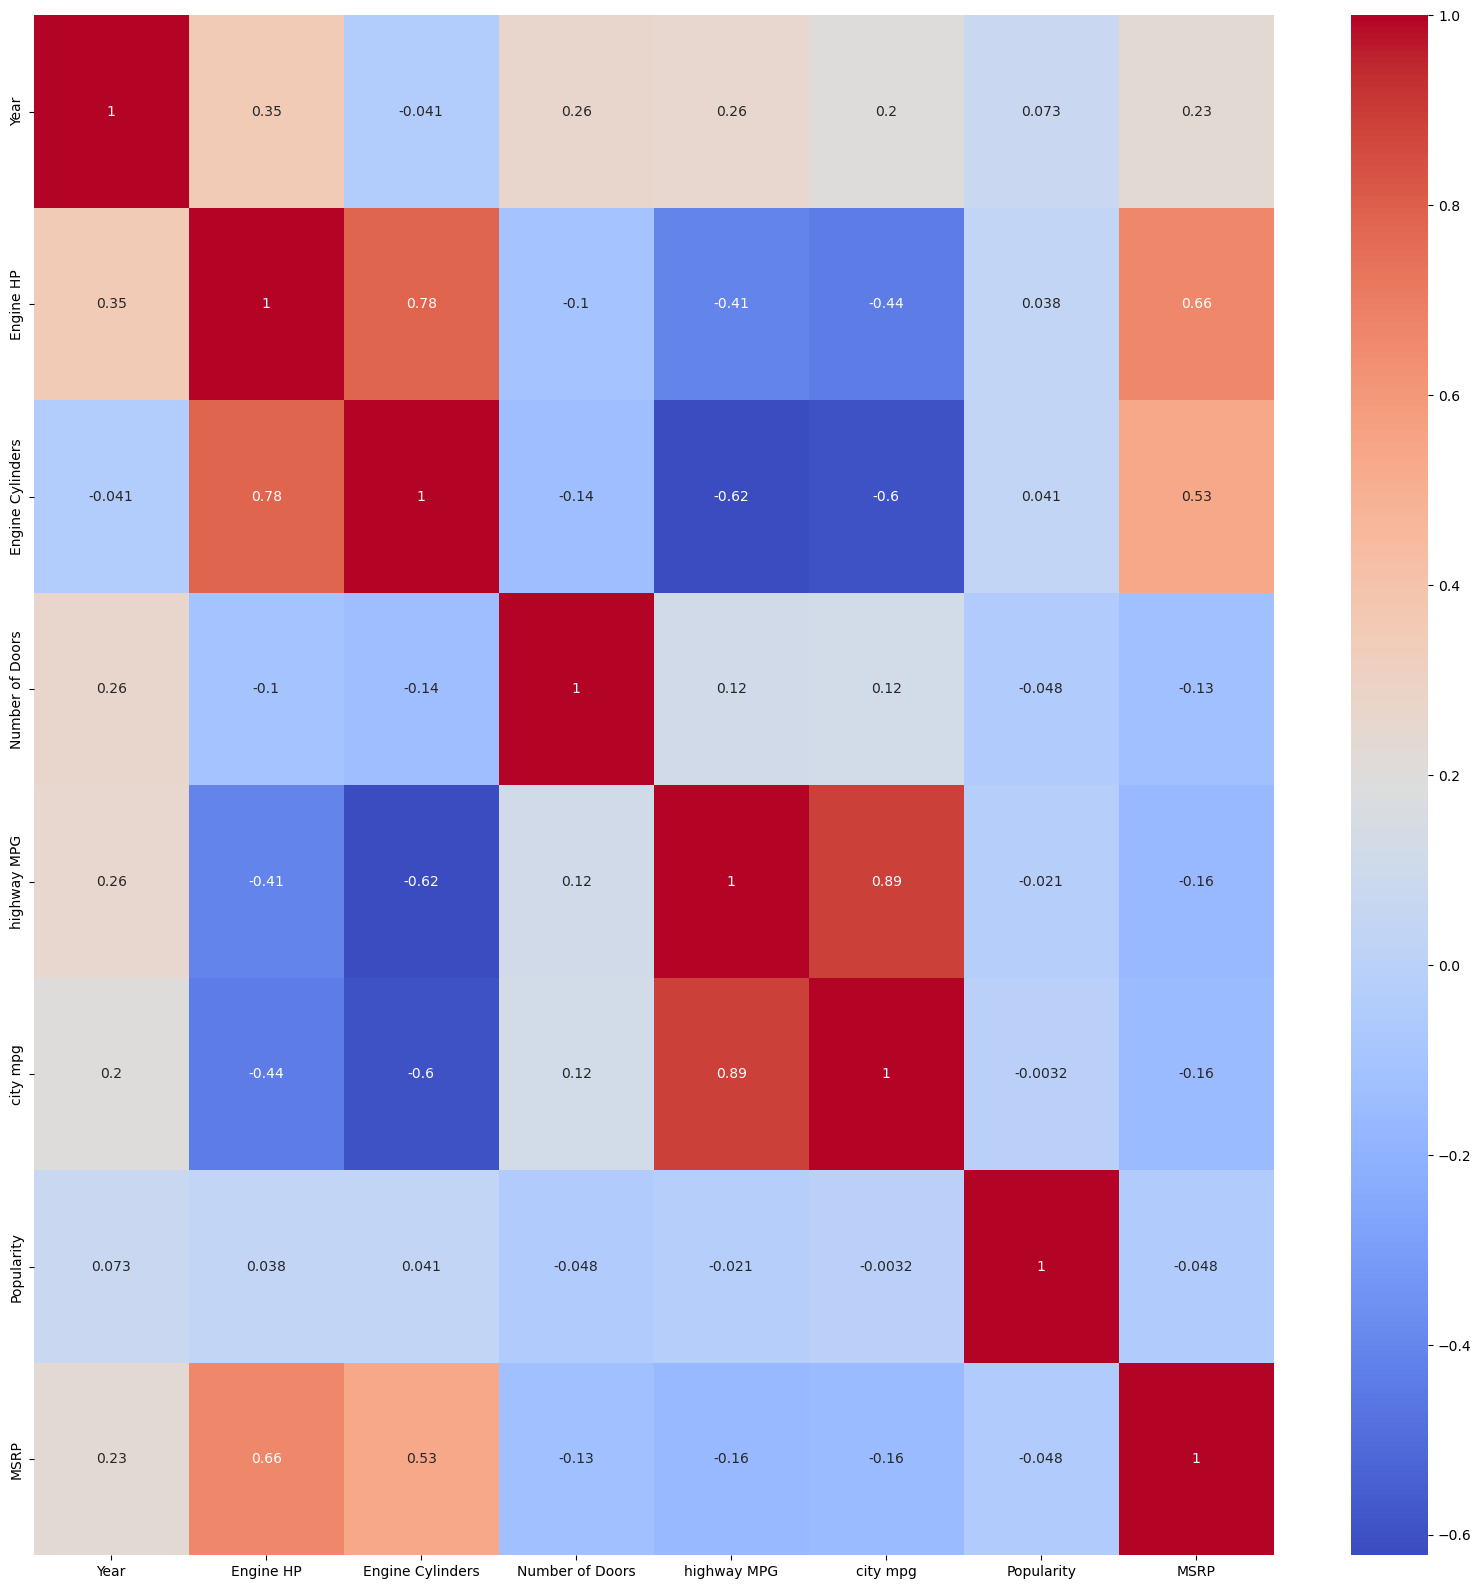

In [32]:
correlation=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.show()

# Data preprocessing

# Handling misssing values

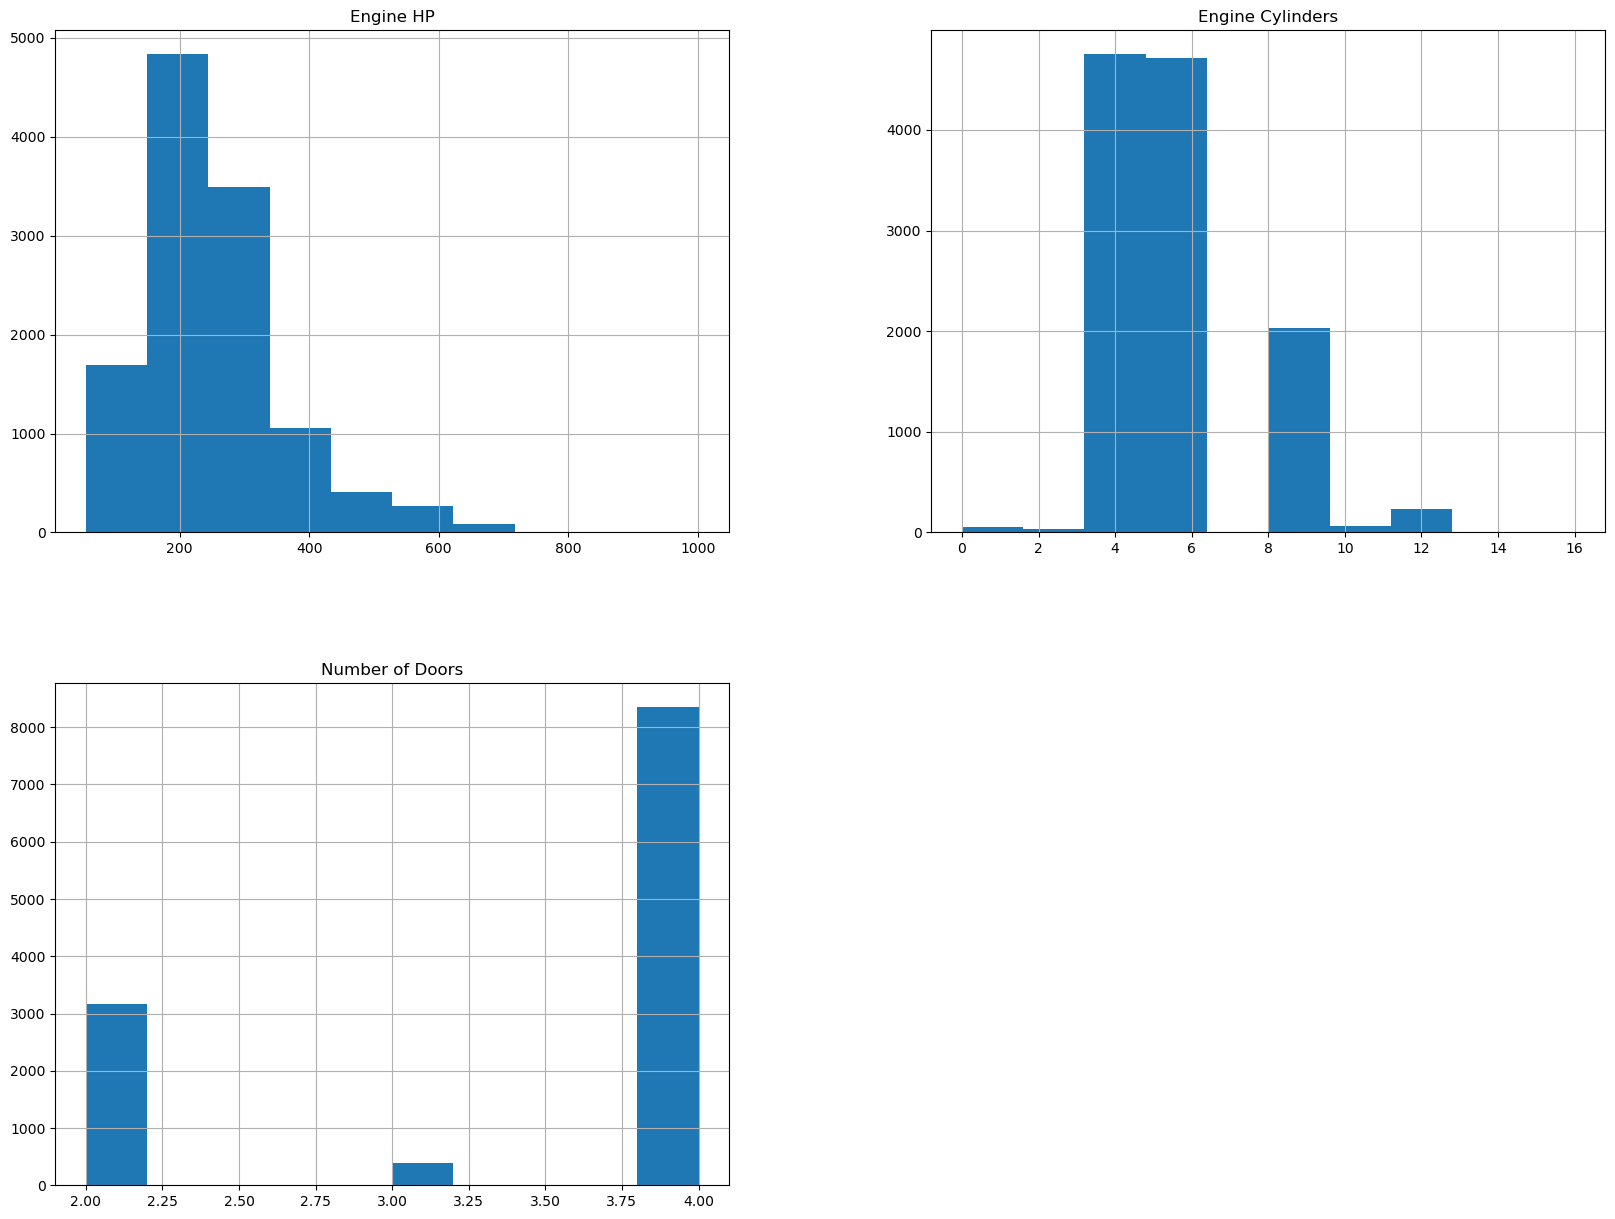

In [33]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [38]:
#We will use Mode to fill up missing values in Categorical columns
data['Market Category'].fillna(data['Market Category'].mode()[0], inplace = True)
data['Engine Fuel Type'].fillna(data['Engine Fuel Type'].mode()[0], inplace = True)
   

#We will use mean to fill up missing values in Numerical Continuous columns
data['Engine HP'].fillna(data['Engine HP'].mean(), inplace = True)

#We will use median to fill up missing values in Ordinal Numerical Discrete columns
data['Engine Cylinders'].fillna(data['Engine Cylinders'].median(), inplace = True)
data['Number of Doors'].fillna(data['Number of Doors'].median(), inplace = True)

#Checking Missing Values after imputing
display(data.isnull().sum().to_frame().reset_index().rename({'index' : 'Variables', 0: 'Missing Values'}, axis =1).style.background_gradient('copper_r'))

,Variables,Missing Values
0,Make,0
1,Model,0
2,Year,0
3,Engine Fuel Type,0
4,Engine HP,0
5,Engine Cylinders,0
6,Transmission Type,0
7,Driven_Wheels,0
8,Number of Doors,0
9,Market Category,0


# Cleaning categorical data

In [41]:
for col in cat_data:
    data[col] = data[col].str.lower().str.replace(" ", "_")
    
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Removing Unusual Category from Transmission Type

In [44]:
data.drop(data.loc[data['Transmission Type']=='unknown'].index, inplace=True)
data.shape

(11895, 16)

In [45]:
data.reset_index(drop=True)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11890,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11891,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11892,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11893,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


# Checking for outliers

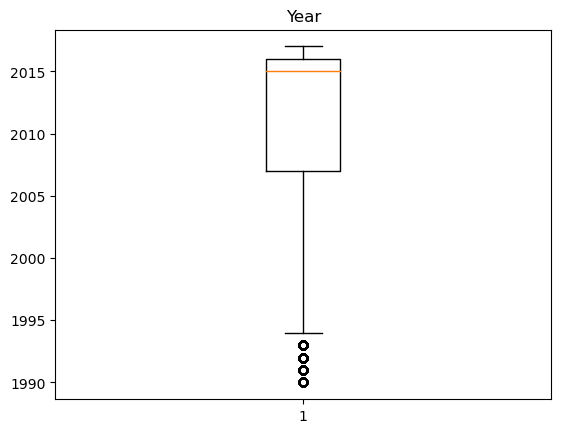

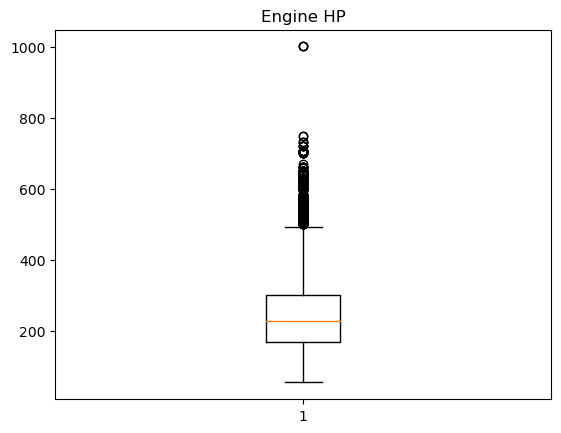

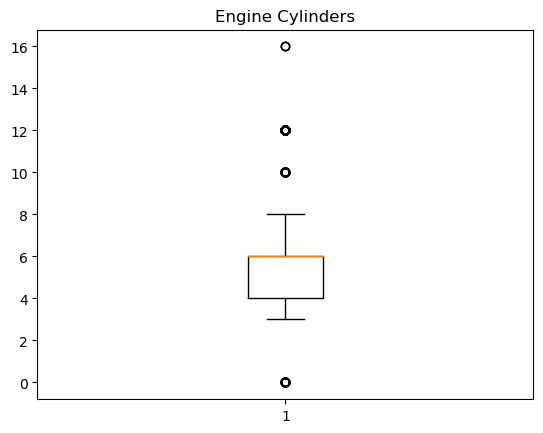

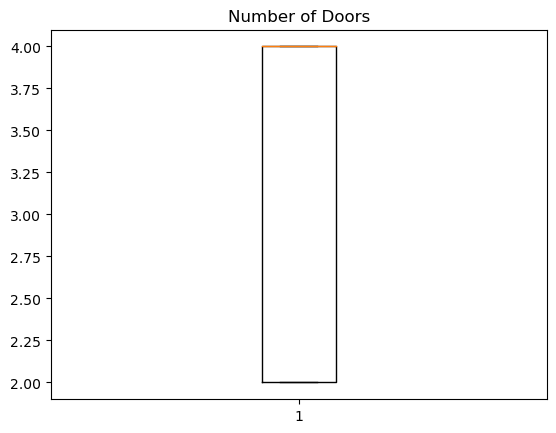

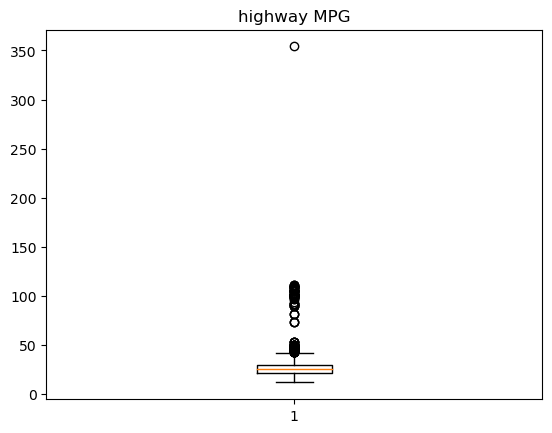

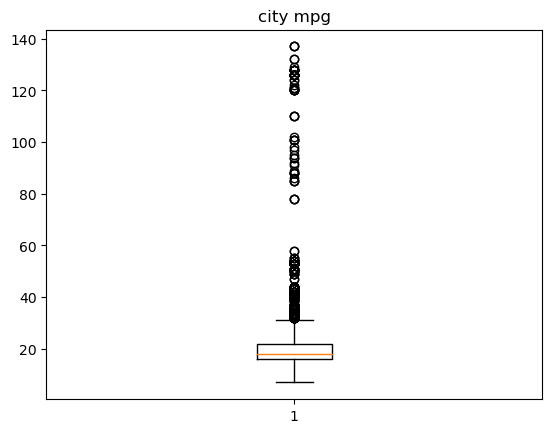

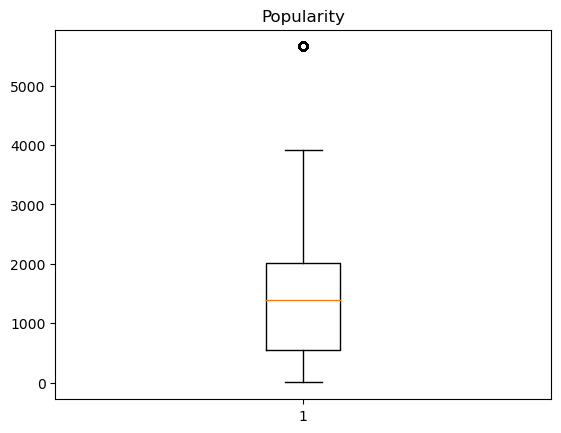

In [50]:
for i in ['Year','Engine HP','Engine Cylinders','Number of Doors','highway MPG','city mpg','Popularity']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [52]:
for i in['Year','Engine HP','Engine Cylinders','highway MPG','city mpg','Popularity']:  
#for i in['Revolving Balance']:  
    q1=np.percentile(data[i],25,interpolation='midpoint')
    q2=np.percentile(data[i],50,interpolation='midpoint')
    q3=np.percentile(data[i],75,interpolation='midpoint')
    iqr=q3-q1
    min_limit=q1-1.5*iqr
    max_limit=q3+1.5*iqr
    outlier=[]
    for x in data[i]:
        if((x>max_limit) or (x<min_limit)):
            outlier.append(x)
    print(outlier)
    data.loc[data[i]>max_limit,i]=np.median(data[i])
    data.loc[data[i]<min_limit,i]=np.median(data[i])
    print("Outliers in ",i," column is removed")

[1992, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1993, 1991, 1991, 1992, 1992, 1993, 1993, 1990, 1990, 1990, 1991, 1991, 1991, 1991, 1991, 1991, 1992, 1992, 1992, 1993, 1993, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1992, 1992, 1993, 1993, 1990, 1990, 1991, 1991, 1992, 1992, 1993, 1993, 1990, 1991, 1991, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1990, 1990, 1991, 1991, 1992, 1993, 1993, 1993, 1990, 1990, 1990, 1990, 1990, 1991, 1991, 1991, 1990, 1990, 1990, 1990, 1990, 1990, 1991, 1991, 1991, 1991, 1991, 1991, 1992, 1992, 1992, 1992, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1991, 1991, 1992, 1992, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1990, 1990, 1991, 1991, 1993, 1993, 1993, 1991, 1992, 1993, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1991, 1992, 1991, 1992, 1992, 1992, 1993, 199

C:\Users\cvamb\AppData\Local\Temp\ipykernel_23064\3689490309.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1=np.percentile(data[i],25,interpolation='midpoint')
C:\Users\cvamb\AppData\Local\Temp\ipykernel_23064\3689490309.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q2=np.percentile(data[i],50,interpolation='midpoint')
C:\Users\cvamb\AppData\Local\Temp\ipykernel_23064\3689490309.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoi

# Label Encoding

In [55]:
org_data=data.copy()
from sklearn.preprocessing import LabelEncoder

In [57]:
le=LabelEncoder()
data['Make']=le.fit_transform(data['Make'])
data['Model']=le.fit_transform(data['Model'])
data['Engine Fuel Type']=le.fit_transform(data['Engine Fuel Type'])
data['Transmission Type']=le.fit_transform(data['Transmission Type'])
data['Driven_Wheels']=le.fit_transform(data['Driven_Wheels'])
data['Market Category']=le.fit_transform(data['Market Category'])
data['Vehicle Size']=le.fit_transform(data['Vehicle Size'])
data['Vehicle Style']=le.fit_transform(data['Vehicle Style'])
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,5,4,2011,8,335.0,6.0,3,3,2.0,38,0,8,26,19,3916,46135
1,5,3,2011,8,300.0,6.0,3,3,2.0,67,0,6,28,19,3916,40650
2,5,3,2011,8,300.0,6.0,3,3,2.0,64,0,8,28,20,3916,36350
3,5,3,2011,8,230.0,6.0,3,3,2.0,67,0,8,28,18,3916,29450
4,5,3,2011,8,230.0,6.0,3,3,2.0,63,0,6,28,18,3916,34500


# Regression

In [63]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split 

from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [61]:
x = data.drop(['MSRP'], axis = 1)
y = data['MSRP']

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [66]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print(x_test,predictions)

      Make  Model  Year  Engine Fuel Type  Engine HP  Engine Cylinders  \
2622     9    160  1997                 9  200.00000               6.0   
7875     3    630  2014                 8  333.00000               6.0   
9852    21    767  2016                 1  249.38607               6.0   
9374    16    738  2017                 9  355.00000               8.0   
1208    17     94  2017                 9  212.00000               4.0   
...    ...    ...   ...               ...        ...               ...   
9396    16    738  2017                 4  285.00000               6.0   
416      5     29  2015                 8  300.00000               6.0   
8416    24    668  2016                 8  467.00000               8.0   
6503    25    498  2005                 8  232.00000               6.0   
1964     9    144  2013                 4  320.00000               8.0   

      Transmission Type  Driven_Wheels  Number of Doors  Market Category  \
2622                  3            

In [67]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean squared error=',mean_squared_error(y_test,predictions))
print('R squared value=',r2_score(y_test,predictions))

Mean squared error= 3459840601.2645593
R squared value= 0.19798988105659443


# Standardisation

In [68]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [69]:
x=std_scaler.fit_transform(x)
y=data['MSRP']

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [71]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print(x_test,predictions)

[[-9.82776342e-01 -1.11969932e+00 -2.39822807e+00 ... -1.01069131e+00
  -8.33583959e-01  1.69673181e-01]
 [-1.39619094e+00  6.22577418e-01  3.78448611e-01 ... -6.73992346e-01
  -6.10744127e-01  2.17313452e+00]
 [-1.55947146e-01  1.13043255e+00  7.05116456e-01 ... -5.94424395e-04
  -1.65064461e-01  5.59882221e-01]
 ...
 [ 5.07601530e-02  7.63442345e-01  7.05116456e-01 ... -1.68943905e-01
  -6.10744127e-01 -9.14758508e-01]
 [ 1.19662586e-01  1.33257143e-01 -1.09155669e+00 ... -3.37293385e-01
  -3.87904294e-01 -1.37252613e+00]
 [-9.82776342e-01 -1.17901087e+00  2.15114689e-01 ... -8.42341827e-01
  -8.33583959e-01  1.69673181e-01]] [25679.84835251 57350.18448335 44031.75397489 ... 88137.02352364
 30924.63377813 58532.85531789]


In [72]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean squared error=',mean_squared_error(y_test,predictions))
print('R squared value=',r2_score(y_test,predictions))

Mean squared error= 3459840601.2645607
R squared value= 0.1979898810565941


# Lasso Regression

In [73]:
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [74]:
x=std_scaler.fit_transform(x)
y=data['MSRP']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [75]:
lasso = Lasso(alpha=1.0)

In [76]:
lasso.fit(x_train, y_train)

Lasso()

Since we get better scores in Lasso regression it can be taken for analysis

# Hyper parameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
n_estimators =[100,150,250]
max_features = ['auto', 'sqrt','log2']
#max_depth = [int(x) for x in np.linspace(10,1000,10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]


random_grid = {
               'n_estimators':n_estimators,
               #'n_estimators':10,
               'max_features': max_features,
               #'max_depth': max_depth,
               #'max_depth': None,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}

In [ ]:
lasso = Lasso(alpha=1.0)
lasso_randomcv = RandomizedSearchCV(estimator=rf, param_distributions = random_grid, n_iter=100, cv=3,verbose=2,random_state=100,n_jobs=-1)

lasso_randomcv.fit(x_train,y_train)

In [ ]:
lasso_randomcv.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'criterion':[rf_randomcv.best_params_['criterion']],
    #'max_depth':[rf_randomcv.best_params_['max_depth']],
    'max_features':[rf_randomcv.best_params_['max_features']],
    'min_samples_leaf':[rf_randomcv.best_params_['min_samples_leaf'],rf_randomcv.best_params_['min_samples_leaf']+1,
                        rf_randomcv.best_params_['min_samples_leaf']+2,rf_randomcv.best_params_['min_samples_leaf']+4],
    'min_samples_split':[rf_randomcv.best_params_['min_samples_split'],rf_randomcv.best_params_['min_samples_split']+1,
                         rf_randomcv.best_params_['min_samples_split']+2],
    'n_estimators':[rf_randomcv.best_params_['n_estimators']-100,rf_randomcv.best_params_['n_estimators'],
                  rf_randomcv.best_params_['n_estimators']+100,rf_randomcv.best_params_['n_estimators']+200]
}